1. 给定dataframe  df=pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
给df新增一列patched_vals, 如果vals相应行非负，则patched_vals等于vals，否则等于组平均值(按照grps分组)。


In [55]:
import numpy as np
import pandas as pd
df=pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
df

,vals,grps
0,-12,A
1,-7,B
2,-14,A
3,4,A
4,-7,A
5,28,B
6,-2,A
7,-1,A
8,8,A
9,-2,B


In [56]:
means=df.groupby("grps").mean()
abmean=df["grps"].map(lambda x: means.iloc[0,0] if x=="A" else means.iloc[1,0])
df["patched_vals"]=df["vals"].map(lambda x: x if x>=0 else np.nan)
df["patched_vals"]=df["patched_vals"].add(abmean*df["patched_vals"].isna(),fill_value=0)
df

,vals,grps,patched_vals
0,-12,A,-0.333333
1,-7,B,6.333333
2,-14,A,-0.333333
3,4,A,4.000000
4,-7,A,-0.333333
5,28,B,28.000000
6,-2,A,-0.333333
7,-1,A,-0.333333
8,8,A,8.000000
9,-2,B,6.333333


2. 读入iris.csv文件到dataframe iris并增加两列：1. petal_ratio=petal_length/petal_width, 2.  sepal_ratio=sepal_length/sepal_width. 使用groupby计算不同品种鸢尾花(variety)
的petal_ratio和sepal_ratio的mean, median, minimum, maximum, standard deviation。


In [25]:
df2=pd.read_csv("iris(1).csv")
df2["petal_ratio"]=df2["petal_length"]/df2["petal_width"]
df2["sepal_ratio"]=df2["sepal_length"]/df2["sepal_width"]
df2

,sepal_length,sepal_width,petal_length,petal_width,variety,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,Setosa,7.000000,1.457143
1,4.9,3.0,1.4,0.2,Setosa,7.000000,1.633333
2,4.7,3.2,1.3,0.2,Setosa,6.500000,1.468750
3,4.6,3.1,1.5,0.2,Setosa,7.500000,1.483871
4,5.0,3.6,1.4,0.2,Setosa,7.000000,1.388889
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2.260870,2.233333
146,6.3,2.5,5.0,1.9,Virginica,2.631579,2.520000
147,6.5,3.0,5.2,2.0,Virginica,2.600000,2.166667
148,6.2,3.4,5.4,2.3,Virginica,2.347826,1.823529


mean, medium, minimum, maximum, standard deviation分别对应于下表中的
mean, 50%, min, max, std

In [58]:
df2[["petal_ratio","sepal_ratio"]].groupby(df2["variety"]).describe()

petal.ratio                                                    \
                 count      mean       std       min       25%       50%   
variety                                                                    
Setosa            50.0  6.908000  2.854545  2.666667  4.687500  7.000000   
Versicolor        50.0  3.242837  0.312456  2.666667  3.016667  3.240385   
Virginica         50.0  2.780662  0.407367  2.125000  2.511364  2.666667   

                           sepal.ratio                                \
                 75%   max       count      mean       std       min   
variety                                                                
Setosa      7.500000  15.0        50.0  1.470188  0.118750  1.268293   
Versicolor  3.417582   4.1        50.0  2.160402  0.228658  1.764706   
Virginica   3.055556   4.0        50.0  2.230453  0.246992  1.823529   

                                                    
                 25%       50%       75%       max  
variety                                             
Setosa      1.385684  1.463063  1.541444  1.956522  
Versicolor  2.033929  2.161290  2.232692  2.818182  
Virginica   2.031771  2.169540  2.342949  2.961538

3. 对于2题中的dataframe iris，随机设置sepal_length,sepal_width,petal_length,petal_width这四列中20个值为nan，然后使用组均值来填充这20个值，并更新petal_ratio和sepal_ratio。

In [27]:
import numpy as np
x=np.repeat(np.arange(len(df2)),4)
y=np.tile(range(4),len(df2))
dft=pd.DataFrame([x,y],index=["x","y"]).T
masks=np.random.choice(range(len(df2)*4),20,replace=False)
dfbatch=dft.iloc[masks]
for i in range(4):
    df2.iloc[dfbatch[dfbatch["y"]==i]["x"],i] =np.nan
df2.isna().sum()

sepal_length    6
sepal_width     7
petal_length    4
petal_width     3
variety         0
petal_ratio     0
sepal_ratio     0
dtype: int64

In [33]:
grouped=df2.groupby("variety",group_keys=False)[["sepal_length","sepal_width","petal_length","petal_width"]]
df2[["sepal_length","sepal_width","petal_length","petal_width"]]=grouped.apply(lambda x:x.fillna(x.mean()))
df2["petal_ratio"]=df2["petal_length"]/df2["petal_width"]
df2["sepal_ratio"]=df2["sepal_length"]/df2["sepal_width"]

In [31]:
df2.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
variety         0
petal_ratio     0
sepal_ratio     0
dtype: int64

In [62]:
for i in range(4):
    print(df2.iloc[dfbatch[dfbatch["y"]==i]["x"],i])
    print(df2.iloc[dfbatch[dfbatch["y"]==i]["x"],4])

36    5.004167
47    5.004167
Name: sepal.length, dtype: float64
36    Setosa
47    Setosa
Name: variety, dtype: object
72    2.778261
73    2.778261
6     3.431250
67    2.778261
94    2.778261
49    3.431250
Name: sepal.width, dtype: float64
72    Versicolor
73    Versicolor
6         Setosa
67    Versicolor
94    Versicolor
49        Setosa
Name: variety, dtype: object
128    5.560417
90     4.253191
149    5.560417
65     4.253191
17     1.460417
97     4.253191
25     1.460417
Name: petal.length, dtype: float64
128     Virginica
90     Versicolor
149     Virginica
65     Versicolor
17         Setosa
97     Versicolor
25         Setosa
Name: variety, dtype: object
3      0.245652
27     0.245652
31     0.245652
145    2.020408
14     0.245652
Name: petal.width, dtype: float64
3         Setosa
27        Setosa
31        Setosa
145    Virginica
14        Setosa
Name: variety, dtype: object


In [63]:
grouped.mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.004167,3.431250,1.460417,0.245652
Versicolor,5.936000,2.778261,4.253191,1.326000
Virginica,6.588000,2.974000,5.560417,2.020408


In [23]:
import pandas as pd
df=pd.read_csv("iris(1).csv")
print(df.apply(lambda x:any(x.isna()),axis=0))
iris_group=df.iloc[:,:4].groupby(df['variety']).transform(lambda x : x.fillna(x.mean(0)))
# df
iris_group

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
variety         False
dtype: bool


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
df.iloc[:,[1,2,4]]
df.ndim
df.shape
'%.3f %%'%4.324242

'4.324 %'

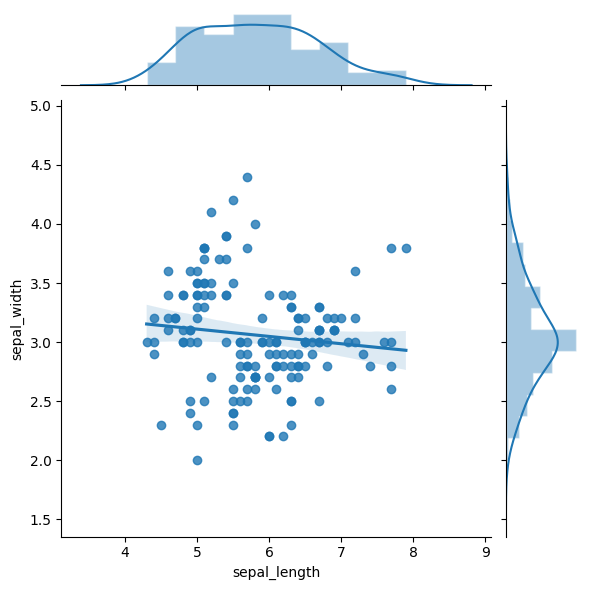

In [38]:
import seaborn as sns
sns.jointplot(x="sepal_length",y="sepal_width",data=df,kind="reg",
              marginal_kws={
                  "element":"step",
                  "kde_kws":dict(cut=3),
                  "alpha":.4,
                  "edgecolor":(1,1,1,.4)
              })